In [1]:
# import the most useful packages
import numpy as np 
import matplotlib
import math
import os
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import tensorflow 
print('finished importing')


finished importing


In [2]:
# make a folder for this course and this project. 
# the -p flag says make any needed parent folders and  don't complain about existing ones.
#my_dir = '/content/drive/My Drive/IW_Semester2'
#! mkdir -p '$my_dir'
# this command is equivalent to "cd" that sets a working directory
#os.chdir(my_dir)
#!ls '/content/drive/My Drive/IW_Semester2/data'

# **Different Sound Representations for Sample Files**

In [4]:
# Get audio
file1 = 'C:/Users/rnr59/Documents/_LDT/recordings/bharath bday true.m4a'
#print("A)")
audio1,sample_rate1=librosa.load(file1)

print(sample_rate1, audio1.shape, audio1.shape[0]/sample_rate1)
ipd.Audio(audio1, rate=sample_rate1)
print("Done")

A)
22050 (60212,) 2.730702947845805
Done


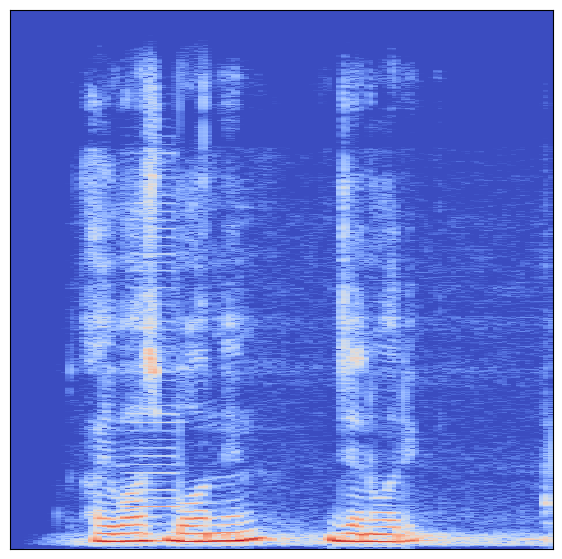

In [5]:
# spectrograms
X = librosa.stft(audio1)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(7, 7))
librosa.display.specshow(Xdb)



C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\3631050197.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0001805  0.00023312 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel1 = librosa.feature.melspectrogram(audio1, sr=sample_rate1, n_fft=1024, hop_length=512, n_mels=80, fmin=75, fmax=3700)


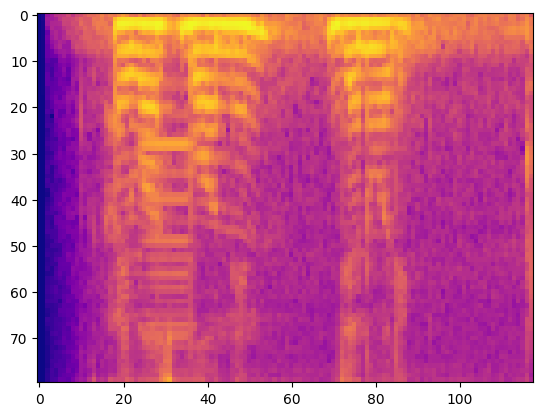

(80, 118)


In [6]:
# mel-spectrograms
import matplotlib.cm as cm

mel1 = librosa.feature.melspectrogram(audio1, sr=sample_rate1, n_fft=1024, hop_length=512, n_mels=80, fmin=75, fmax=3700)
plt.imshow(np.log10(mel1 + 1e-10), aspect='auto', cmap=cm.plasma)
plt.show()
print(mel1.shape)


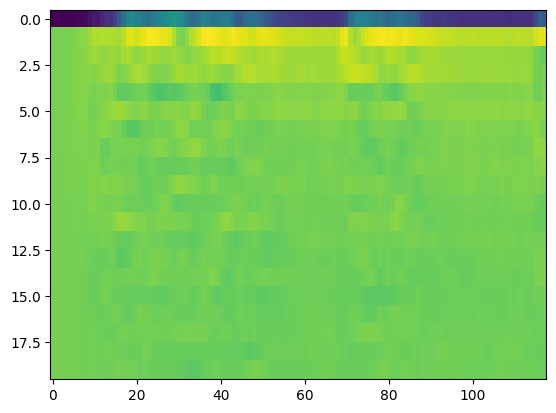

(20, 118)
60212


In [7]:
# MFCC

mfcc = librosa.feature.mfcc(y=audio1, sr=sample_rate1, n_mfcc=20)
plt.imshow(mfcc, aspect='auto', cmap=cm.viridis)
plt.show()



print(mfcc.shape)
print(len(audio1))

def mp3tomfcc(file_path, max_pad):
  audio, sample_rate = librosa.core.load(file_path)
  mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=20)
  pad_width = max_pad - mfcc.shape[1]
  if (pad_width > 0):
    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
  else:
    mfcc = mfcc[:,0:max_pad]
  return mfcc
  

(257, 471)
(257, 471)


C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\1864029971.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.0001805  0.00023312 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch1, mag = librosa.core.piptrack(audio1, sr=sample_rate1, n_fft=512)


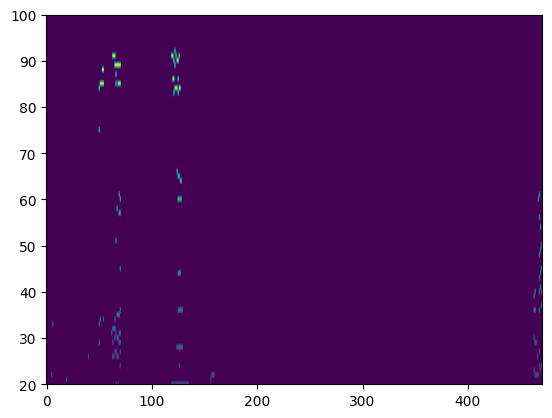

In [8]:
# Pitch

pitch1, mag = librosa.core.piptrack(audio1, sr=sample_rate1, n_fft=512)
plt.imshow(pitch1, aspect='auto')
print(pitch1.shape)
print(mag.shape)
plt.ylim([20,100])
plt.show()




# Preprocessing

In [10]:
# Compile MFCCs and extract labels: https://github.com/adhishthite/sound-mnist/blob/master/utils/wav2mfcc.py

mfccs = []
file_path ='C:/Users/rnr59/Documents/_LDT/recordings'
index = 0
ll=os.listdir(file_path)
#print(ll)
n=len(ll)
for i in range(n):
  new_path = file_path +'/'+ str(ll[i])
  if os.path.exists(new_path):
      mfccs.append(mp3tomfcc(new_path, 1000)) 
      index = index + 1
      print(index)
      print(ll[i])

1
bharath bday true.m4a
2
bharath dad lie.m4a
3
bharath dad true.m4a
4
bharath dday lie.m4a
5
pranav bday lie.m4a
6
pranav bday true.m4a
7
pranav dad lie.m4a
8
pranav dad true.m4a
9
pranav name lie.m4a
10
pranav name true.m4a
11
ranesh bday lie.m4a
12
ranesh bday true.m4a
13
ranesh dad lie.m4a
14
ranesh dad true.m4a
15
ranesh name lie.m4a
16
ranesh name true.m4a
17
sam bday lie.m4a
18
sam bday true.m4a
19
sam name lie.m4a
20
sam name true.m4a
21
varshit bday lie.m4a
22
varshit bday true.m4a
23
varshit dad lie.m4a
24
varshit dad true.m4a
25
varshit name lie.m4a
26
varshit name true.m4a


In [11]:
# Save all MFCCs so that don't have to recreate MFCC array every run
mfccs = np.asarray(mfccs)
print(mfccs.shape)
np.save('mfccs_all_loy_no_pad1000.npy', mfccs)
mfccs_loaded = np.load('mfccs_all_loy_no_pad1000.npy')
print(mfccs_loaded[0])


(26, 20, 1000)
[[-5.92530151e+02 -5.92530151e+02 -5.92398315e+02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.84858680e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.79798067e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00 -1.23577595e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.41261801e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.56375766e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [12]:
# Gather all labels
labels = []

file_path = 'C:/Users/rnr59/Documents/_LDT/recordings'
index = 0
numTruth = 0
numLie = 0
ll=os.listdir(file_path)
#print(ll)
n=len(ll)

for i in range(n):
  new_path = file_path +'/'+ str(ll[i])
  if os.path.exists(new_path):
        #label = f.split('_')[-1][0] # label is the last character after the last '_'
        
        # truth = 0; lie = 1
        if ("true" in ll[i]):
          labels.append(0)
          numTruth = numTruth + 1
        else:
          labels.append(1)
          numLie = numLie + 1

        index = index + 1


print(numTruth)
print(numLie)
print(numTruth + numLie)
print(numTruth/(numTruth + numLie))

13
13
26
0.5


In [13]:
import tensorflow 
#from tf.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels, num_classes=None)
print(labels.shape)

(26, 2)


In [14]:
# load labels into drive to avoid having to recreate labels every run
np.save('labels_all_loy.npy', labels)
labels_loaded = np.load('labels_all_loy.npy')

In [15]:
# get pitches
def mp3topitch(file_path, max_pad1, max_pad2):
  audio, sample_rate = librosa.core.load(file_path)
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)
  print(pitch.shape)
  if (pitch.shape[0] < max_pad1):
    pad_width = max_pad1 - pitch.shape[0]
    pitch = np.pad(pitch, pad_width=((0, 0), (0, pad_width)), mode='constant')
  else: pitch = pitch[0:max_pad1]

  if (pitch.shape[1] < max_pad2):
    pad_width = max_pad2 - pitch.shape[1]
    pitch = np.pad(pitch, pad_width=((0, 0), (0, pad_width)), mode='constant')
#   else: pitch = pitch[:,0:max_pad2]
  
#   if (pitch.shape[1] != max_pad2):
#     print(pitch.shape)
  return pitch

pitches = []
file_path = 'C:/Users/rnr59/Documents/_LDT/recordings'
index = 0
ll=os.listdir(file_path)
#print(ll)
n=len(ll)
  
for i in range(n):
  new_path = file_path +'/'+str(ll[i])

  if os.path.exists(new_path):
        pitches.append(mp3topitch(new_path, 257, 2000)) 
        index = index + 1
        print(index)
        print(ll[i])

C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0001805  0.00023312 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)
C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00321626 0.00338852 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)


(257, 471)
1
bharath bday true.m4a
(257, 963)
2
bharath dad lie.m4a


C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01045763 0.01309435 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)
C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00064336 -0.00367473
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)


(257, 445)
3
bharath dad true.m4a
(257, 471)
4
bharath dday lie.m4a


C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0039997  -0.00397842
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)
C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00992019 0.00549637 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)
C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01382494 -0.01354626
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)

(257, 357)
5
pranav bday lie.m4a
(257, 287)
6
pranav bday true.m4a
(257, 375)
7
pranav dad lie.m4a


C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00369308 -0.00308587
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)
C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01025211 0.00623448 0.0017522 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)


(257, 390)
8
pranav dad true.m4a
(257, 386)
9
pranav name lie.m4a


C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02802397 -0.01850639
 -0.02069278] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)
C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00145418 0.00195688 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)


(257, 368)
10
pranav name true.m4a
(257, 482)
11
ranesh bday lie.m4a


C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00357535 -0.00314594
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)
C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00833019 0.00859694 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)


(257, 456)
12
ranesh bday true.m4a
(257, 581)
13
ranesh dad lie.m4a


C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.12652527 0.14499085 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)
C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00689175 0.0072219  0.0063697 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)


(257, 419)
14
ranesh dad true.m4a
(257, 515)
15
ranesh name lie.m4a


C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00664018 0.00751094 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)
C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02698828 -0.03252482
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)


(257, 361)
16
ranesh name true.m4a
(257, 611)
17
sam bday lie.m4a


C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02507083 -0.0267857
 -0.02003105] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)
C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02004238 -0.02275271
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)


(257, 386)
18
sam bday true.m4a
(257, 908)
19
sam name lie.m4a


C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00702571 0.00555582 0.00782459] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)


(257, 350)
20
sam name true.m4a


C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00787932 0.01064767 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)
C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01754819 -0.01010347
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)


(257, 622)
21
varshit bday lie.m4a
(257, 467)
22
varshit bday true.m4a


C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00037194 -0.00434104
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)
C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00134896 -0.00046
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)


(257, 794)
23
varshit dad lie.m4a
(257, 390)
24
varshit dad true.m4a
(257, 442)
25
varshit name lie.m4a
(257, 438)
26
varshit name true.m4a


C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02870565 0.03782574 0.03599353] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)
C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0070539  0.00809539 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)


In [16]:
# load pitches into drive to avoid having to recreate pitches every run
print(len(pitches[0][0]))
pitches = np.asarray(pitches)
print(pitches.shape)
np.save('pitches_all_loy.npy', pitches)
pitches_loaded = np.load('pitches_all_loy.npy')

2000
(26, 257, 2000)


(257, 471)
(257, 1000)


C:\Users\rnr59\AppData\Local\Temp\ipykernel_18896\2531591391.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0001805  0.00023312 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio, sr=sample_rate, n_fft=512)


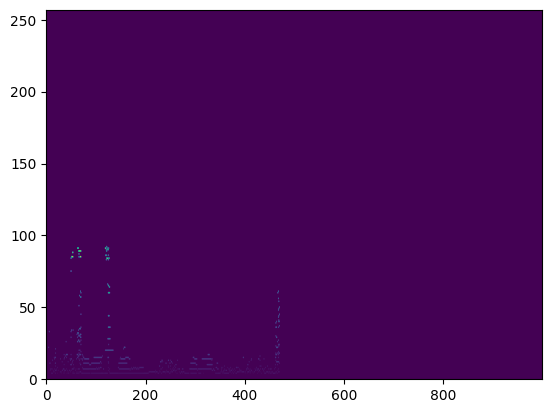

In [17]:
test = mp3topitch(file1, 257, 1000)
print(test.shape)
plt.imshow(test, aspect='auto', cmap=cm.viridis)
plt.ylim([0,257])
plt.show()

# Classification

In [18]:
## Classifier  ##


import IPython.display as ipd
import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing import sequence
#from keras.utils import np_utils
from keras.optimizers import Adam
from keras.utils import to_categorical
import numpy as np 
import matplotlib
import math
import os
from matplotlib import pyplot as plt
import IPython.display as ipd
print('finished importing')
import librosa
import librosa.display

# drive.mount('/content/drive')

# my_dir = '/content/drive/My Drive/IW06/AliceProject'
# ! mkdir -p '$my_dir'
# os.chdir(my_dir)


def get_seq_model(input_shape, num_classes):
  model = Sequential()
  model.add(LSTM(units=16, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(LSTM(units=8, dropout=0.05, recurrent_dropout=0.35, return_sequences=True))
  model.add(Flatten())
  model.add(Dense(2, activation='softmax'))
#   model.compile(optimizer=keras.optimizers.Adadelta(),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001,decay=0.0), metrics=['accuracy'])
  return model

mfccs = np.load('mfccs_all_loy_no_pad1000.npy').tolist()
mfccs = np.asarray(mfccs)
labels = np.load('labels_all_loy.npy')

'''mfccs = np.load('mfccs_all_loy_no_pad1000.npy').tolist()
mfccs = np.asarray(mfccs)
labels = np.load('mfccs_all_loy_no_pad1000.npy')'''

dim_1 = mfccs.shape[1]
dim_2 = mfccs.shape[2]
channels = 1
classes = 2

X = mfccs
print(X.shape)
print(X.shape)
y = labels
# input_shape = (dim_1, dim_2, channels)
# input_shape = (dim_2, channels)
# input_shape = (dim_1, dim_2)
input_shape = (X.shape[1], X.shape[2])

finished importing
(26, 20, 1000)
(26, 20, 1000)


In [19]:
# Import ML models from sklearn
from sklearn.linear_model import LogisticRegression # Regression classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn import svm # Support Vector Machine
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # Random Forest and Gradient Boosting Classifier
from sklearn.naive_bayes import MultinomialNB # Naive Bayes Classifier 
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix # Some metrics to check the performance of the models

In [20]:
# Setting parameters for each algorithm - these are tunable to achieve max accuracy

Classifiers = {'LR':LogisticRegression(random_state=10,C=5,max_iter=200),
               'DTC':DecisionTreeClassifier(random_state=10,min_samples_leaf=2),
               'RF':RandomForestClassifier(random_state=10,n_estimators=100,n_jobs=-1),
               'GBC':GradientBoostingClassifier(random_state=10,n_estimators=400,learning_rate=0.2),
               'SGD':SGDClassifier(loss="hinge", penalty="l2"),
               #'SVM':svm.SVC(kernel='linear', C=0.1, probability=True)
              }

In [21]:
# reshape to 2d
nsamples, nx, ny = X.shape
X_final = X.reshape((nsamples,nx*ny))
y_final = np.argmax(y, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=1)
print(X_train.shape)
print(y_train.shape)

(18, 20000)
(18,)


In [22]:
def print_stats(y_test, pred):
    CM = confusion_matrix(y_test,pred)
    TN, FP, FN, TP = confusion_matrix(y_test, pred).ravel()

    Accuracy = accuracy_score(y_test,pred)
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    F1 = 2 * (Precision * Recall) / (Precision + Recall)

    print('==='*20)
    print('Accuracy = '+str(Accuracy))
    print('==='*20) 
    print('Precision = '+str(Precision))
    print('==='*20) 
    print('Recall = '+str(Recall))
    print('==='*20) 
    print('F1 = '+str(F1))
    print('==='*20) 
    print(CM)

In [23]:
# Create a pipeline so you can reuse the code
def ML_Pipeline(clf_name):
    clf = Classifiers[clf_name]
    fit = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    np.asarray(pred)
    np.save('MFCC_'+clf_name, pred)
    
    print_stats(y_test, pred)

In [35]:
ML_Pipeline('LR')

Accuracy = 0.75
Precision = 1.0
Recall = 0.6
F1 = 0.7499999999999999
[[3 0]
 [2 3]]


In [25]:
ML_Pipeline('DTC')

Accuracy = 0.5
Precision = 0.6666666666666666
Recall = 0.4
F1 = 0.5
[[2 1]
 [3 2]]


In [26]:
ML_Pipeline('RF')

Accuracy = 0.625
Precision = 1.0
Recall = 0.4
F1 = 0.5714285714285715
[[3 0]
 [3 2]]


In [27]:
ML_Pipeline('GBC')

Accuracy = 0.5
Precision = 0.6
Recall = 0.6
F1 = 0.6
[[1 2]
 [2 3]]


In [33]:
ML_Pipeline('SGD')

Accuracy = 0.75
Precision = 1.0
Recall = 0.6
F1 = 0.7499999999999999
[[3 0]
 [2 3]]
